Findings:
- Of the drugs analyzed, Capomulin was by far the most successful.

- Capomulin results showed:
 1. It had the only decrease in average tumor volume.
 2. Metastic spread during treatment was also lowest for Capomulin, and its standard error was relatively low.
 3. The highest mouse survival rate.  21 of 25 were alive at the end of the treatment, while other drugs were all below 50%.
 4. Its tumor size decreased ~20% on average over the 45 day period.


- Other drugs analyzed were similar to results of the placebo.
     

In [732]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

In [733]:
# preview of mouse data
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [734]:
# preview of trial data
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [735]:
# Combine the data into a single dataset
combined_df = pd.merge(trial_df, mouse_df, how="outer", on="Mouse ID")

In [736]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [737]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_mean = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame and preview DataFrame
tumor_mean = tumor_mean["Tumor Volume (mm3)"].mean().reset_index()

# Rename tumor volume column
tumor_mean = tumor_mean.rename(columns= {"Tumor Volume (mm3)" : "Avg Tumor Volume"}) 
tumor_mean.head()

,Drug,Timepoint,Avg Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [738]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame and preview DataFrame
tumor_se = tumor_se["Tumor Volume (mm3)"].sem().reset_index()

# Rename tumor volume column
tumor_se = tumor_se.rename(columns= {"Tumor Volume (mm3)" : "Tumor Volume Std Error"}) 
tumor_se.head()

,Drug,Timepoint,Tumor Volume Std Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [739]:
# list of unique time points
timepoints = combined_df["Timepoint"].unique()
timepoints

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [740]:
# Pivot mean table
# Preview that Reformatting worked
tumor_mean = pd.pivot_table(tumor_mean, "Avg Tumor Volume", index = ["Timepoint"], columns = ["Drug"])
tumor_mean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [741]:
# Pivot std error table
# Preview that Reformatting worked
tumor_se = pd.pivot_table(tumor_se, "Tumor Volume Std Error", index = ["Timepoint"], columns = ["Drug"])
tumor_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


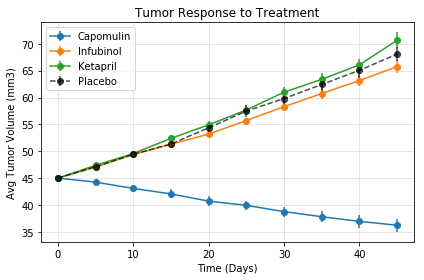

In [742]:
# Generate the Plot (with Error Bars) for Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(timepoints, tumor_mean["Capomulin"], yerr=tumor_se["Capomulin"], marker="o")
plt.errorbar(timepoints, tumor_mean["Infubinol"], yerr=tumor_se["Infubinol"], marker="o")
plt.errorbar(timepoints, tumor_mean["Ketapril"], yerr=tumor_se["Ketapril"], marker="o")
plt.errorbar(timepoints, tumor_mean["Placebo"], yerr=tumor_se["Placebo"], color="black", alpha=.7, linestyle="--",marker="o")
plt.xlabel("Time (Days)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best")
plt.grid(color="grey", alpha=.25)
plt.tight_layout()

# Save the Figure
plt.savefig("Images/tumor_response.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [743]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
met_mean = met_mean["Metastatic Sites"].mean().reset_index()

# Preview DataFrame
met_mean = met_mean.rename(columns= {"Metastatic Sites" : "Avg Metastatic Response"}) 
met_mean.head()


,Drug,Timepoint,Avg Metastatic Response
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [744]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
met_se = met_se["Metastatic Sites"].sem().reset_index()

# Preview DataFrame
met_se = met_se.rename(columns= {"Metastatic Sites" : "Metastatic Response Std Error"}) 
met_se.head()



,Drug,Timepoint,Metastatic Response Std Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [745]:
# Pivot mean error table
# Preview that Reformatting worked
met_mean = pd.pivot_table(met_mean, "Avg Metastatic Response", index = ["Timepoint"], columns = ["Drug"])
met_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [746]:
# Pivot std error table
# Preview that Reformatting worked
met_se = pd.pivot_table(met_se, "Metastatic Response Std Error", index = ["Timepoint"], columns = ["Drug"])
met_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


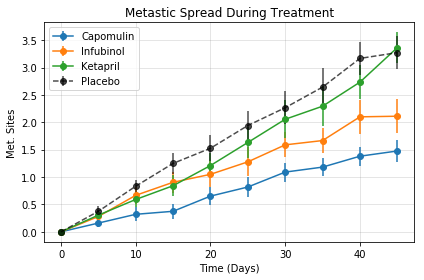

In [747]:
# Generate the Plot for Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(timepoints, met_mean["Capomulin"], yerr=met_se["Capomulin"], marker="o")
plt.errorbar(timepoints, met_mean["Infubinol"], yerr=met_se["Infubinol"], marker="o")
plt.errorbar(timepoints, met_mean["Ketapril"], yerr=met_se["Ketapril"], marker="o")
plt.errorbar(timepoints, met_mean["Placebo"], yerr=met_se["Placebo"], color="black", alpha=.7, linestyle="--",marker="o")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastic Spread During Treatment")
plt.legend(loc="best")
plt.grid(color="grey", alpha=.25)
plt.tight_layout()

# Save the Figure
plt.savefig("Images/met_sites.png")

# Show the Figure
plt.show()

## Survival Rates

In [748]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mouse_count = mouse_count["Mouse ID"].count().reset_index()

# Preview DataFrame
mouse_count = mouse_count.rename(columns= {"Mouse ID" : "Mouse Count"}) 
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [749]:
# Pivot count table
# Preview that Reformatting worked
mouse_count = pd.pivot_table(mouse_count, "Mouse Count", index = ["Timepoint"], columns = ["Drug"])
mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


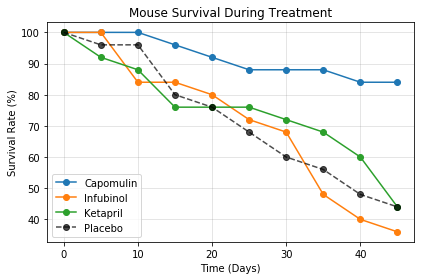

In [750]:
# Generate the Plot (Accounting for percentages) for Capomulin, Infubinol, Ketapril, and Placebo
plt.plot(timepoints, mouse_count["Capomulin"] / mouse_count["Capomulin"].max() *100, marker="o")
plt.plot(timepoints, mouse_count["Infubinol"] / mouse_count["Infubinol"].max() *100, marker="o")
plt.plot(timepoints, mouse_count["Ketapril"] / mouse_count["Ketapril"].max() *100, marker="o")
plt.plot(timepoints, mouse_count["Placebo"] / mouse_count["Placebo"].max() *100, 
         color="black", alpha=.7, linestyle="--",marker="o")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Mouse Survival During Treatment")
plt.legend(loc="best")
plt.grid(color="grey", alpha=.25)
plt.tight_layout()


# Save the Figure
plt.savefig("Images/mouse_count.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [751]:
# volume at start
tumor_vol_start = tumor_mean.iloc[0, :]
tumor_vol_start

Drug
Capomulin    45.0
Ceftamin     45.0
Infubinol    45.0
Ketapril     45.0
Naftisol     45.0
Placebo      45.0
Propriva     45.0
Ramicane     45.0
Stelasyn     45.0
Zoniferol    45.0
Name: 0, dtype: float64

In [752]:
# volume at end after 45 days
tumor_vol_end = tumor_mean.iloc[-1, :]
tumor_vol_end

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [753]:
drugs = combined_df["Drug"].unique()
drugs


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [754]:
# create a change dataframe combining drugs, start volume, and final volume
# add in a colume for volume change, round to the tenth decimal place

vol_change_df = pd.DataFrame({"Starting Volume" : tumor_vol_start,
                              "Final Volume" : tumor_vol_end,
                              "Volume Change" : (((tumor_vol_end / tumor_vol_start) -1) *100).round(1)
                             })
vol_change_df = vol_change_df.reset_index()
vol_change_df

,Drug,Starting Volume,Final Volume,Volume Change
0,Capomulin,45.0,36.236114,-19.5
1,Ceftamin,45.0,64.132421,42.5
2,Infubinol,45.0,65.755562,46.1
3,Ketapril,45.0,70.662958,57.0
4,Naftisol,45.0,69.265506,53.9
5,Placebo,45.0,68.084082,51.3
6,Propriva,45.0,66.258529,47.2
7,Ramicane,45.0,34.955595,-22.3
8,Stelasyn,45.0,68.438310,52.1
9,Zoniferol,45.0,65.960888,46.6


In [755]:
# Create a trimmed dataframe for only the drugs that we're evaluating
vol_change_interst = vol_change_df.loc[(vol_change_df["Drug"] == "Capomulin") | (
    vol_change_df["Drug"] == "Infubinol") | (vol_change_df["Drug"] == "Ketapril") | 
    (vol_change_df["Drug"] == "Placebo")  , :]
                                       
vol_change_interst.reset_index()

,index,Drug,Starting Volume,Final Volume,Volume Change
0,0,Capomulin,45.0,36.236114,-19.5
1,2,Infubinol,45.0,65.755562,46.1
2,3,Ketapril,45.0,70.662958,57.0
3,5,Placebo,45.0,68.084082,51.3


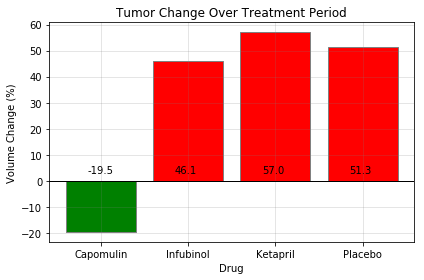

In [756]:
# Generate the Plot (Accounting for percentages) for Capomulin, Infubinol, Ketapril, and Placebo
x_axis = np.arange(len(vol_change_interst))
color = ['green', 'red', 'red', 'red']

bars = plt.bar(x_axis, vol_change_interst["Volume Change"], color=color, edgecolor="grey", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, vol_change_interst["Drug"])

plt.xlabel("Drug")
plt.ylabel("Volume Change (%)")
plt.title("Tumor Change Over Treatment Period")
plt.grid(color="grey", alpha=.25)
plt.axhline(y=0,linewidth=1, color="Black")
plt.tight_layout()


# Use functions to label the percentages of changes (copied code found elsewhere)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + .25, 3, yval)

# Save the Figure
plt.savefig("Images/tumor_change.png")

# Show the Figure
plt.show()